## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.1ms	remaining: 52s
1:	learn: 0.9301086	total: 56.1ms	remaining: 28s
2:	learn: 0.9005637	total: 59.4ms	remaining: 19.7s
3:	learn: 0.8720983	total: 62.7ms	remaining: 15.6s
4:	learn: 0.8467410	total: 65.8ms	remaining: 13.1s
5:	learn: 0.8226672	total: 68.9ms	remaining: 11.4s
6:	learn: 0.7994702	total: 72ms	remaining: 10.2s
7:	learn: 0.7784272	total: 75.3ms	remaining: 9.34s
8:	learn: 0.7602192	total: 78.3ms	remaining: 8.62s
9:	learn: 0.7412421	total: 81.6ms	remaining: 8.08s
10:	learn: 0.7247930	total: 84.6ms	remaining: 7.6s
11:	learn: 0.7089951	total: 87.5ms	remaining: 7.2s
12:	learn: 0.6951345	total: 90.4ms	remaining: 6.86s
13:	learn: 0.6809276	total: 93.4ms	remaining: 6.58s
14:	learn: 0.6692630	total: 96.3ms	remaining: 6.33s
15:	learn: 0.6588323	total: 99.4ms	remaining: 6.11s
16:	learn: 0.6472700	total: 102ms	remaining: 5.92s
17:	learn: 0.6379982	total: 105ms	remaining: 5.75s
18:	learn: 0.6294674	total: 108ms	remaining: 5.59s
19:

43:	learn: 0.5116444	total: 187ms	remaining: 4.07s
44:	learn: 0.5100547	total: 190ms	remaining: 4.04s
45:	learn: 0.5069096	total: 193ms	remaining: 4.01s
46:	learn: 0.5051685	total: 196ms	remaining: 3.98s
47:	learn: 0.5033968	total: 199ms	remaining: 3.96s
48:	learn: 0.5012433	total: 202ms	remaining: 3.93s
49:	learn: 0.4986132	total: 206ms	remaining: 3.91s
50:	learn: 0.4968022	total: 209ms	remaining: 3.89s
51:	learn: 0.4951632	total: 212ms	remaining: 3.86s
52:	learn: 0.4928924	total: 215ms	remaining: 3.84s
53:	learn: 0.4917272	total: 219ms	remaining: 3.83s
54:	learn: 0.4895079	total: 222ms	remaining: 3.81s
55:	learn: 0.4881884	total: 225ms	remaining: 3.79s
56:	learn: 0.4861566	total: 228ms	remaining: 3.78s
57:	learn: 0.4850201	total: 232ms	remaining: 3.76s
58:	learn: 0.4840055	total: 235ms	remaining: 3.74s
59:	learn: 0.4824455	total: 238ms	remaining: 3.73s
60:	learn: 0.4809744	total: 241ms	remaining: 3.71s
61:	learn: 0.4801376	total: 244ms	remaining: 3.69s
62:	learn: 0.4792422	total: 247

100:	learn: 0.4487329	total: 374ms	remaining: 3.33s
101:	learn: 0.4481325	total: 377ms	remaining: 3.32s
102:	learn: 0.4475445	total: 380ms	remaining: 3.31s
103:	learn: 0.4466014	total: 383ms	remaining: 3.3s
104:	learn: 0.4461730	total: 387ms	remaining: 3.29s
105:	learn: 0.4457259	total: 390ms	remaining: 3.29s
106:	learn: 0.4451085	total: 393ms	remaining: 3.28s
107:	learn: 0.4447909	total: 396ms	remaining: 3.27s
108:	learn: 0.4440936	total: 399ms	remaining: 3.26s
109:	learn: 0.4435519	total: 402ms	remaining: 3.25s
110:	learn: 0.4431075	total: 405ms	remaining: 3.24s
111:	learn: 0.4425498	total: 408ms	remaining: 3.24s
112:	learn: 0.4419106	total: 412ms	remaining: 3.23s
113:	learn: 0.4414425	total: 415ms	remaining: 3.22s
114:	learn: 0.4407446	total: 418ms	remaining: 3.21s
115:	learn: 0.4402011	total: 421ms	remaining: 3.21s
116:	learn: 0.4398559	total: 424ms	remaining: 3.2s
117:	learn: 0.4392990	total: 427ms	remaining: 3.19s
118:	learn: 0.4389153	total: 430ms	remaining: 3.18s
119:	learn: 0.

162:	learn: 0.4192052	total: 565ms	remaining: 2.9s
163:	learn: 0.4187949	total: 568ms	remaining: 2.89s
164:	learn: 0.4184572	total: 571ms	remaining: 2.89s
165:	learn: 0.4180680	total: 574ms	remaining: 2.88s
166:	learn: 0.4176884	total: 577ms	remaining: 2.88s
167:	learn: 0.4173026	total: 580ms	remaining: 2.87s
168:	learn: 0.4170486	total: 583ms	remaining: 2.87s
169:	learn: 0.4165960	total: 587ms	remaining: 2.86s
170:	learn: 0.4161870	total: 589ms	remaining: 2.86s
171:	learn: 0.4156228	total: 593ms	remaining: 2.85s
172:	learn: 0.4153041	total: 596ms	remaining: 2.85s
173:	learn: 0.4148857	total: 599ms	remaining: 2.84s
174:	learn: 0.4144190	total: 602ms	remaining: 2.84s
175:	learn: 0.4140875	total: 605ms	remaining: 2.83s
176:	learn: 0.4136755	total: 608ms	remaining: 2.83s
177:	learn: 0.4133860	total: 611ms	remaining: 2.82s
178:	learn: 0.4129780	total: 614ms	remaining: 2.81s
179:	learn: 0.4122907	total: 617ms	remaining: 2.81s
180:	learn: 0.4119188	total: 620ms	remaining: 2.81s
181:	learn: 0

224:	learn: 0.3973704	total: 754ms	remaining: 2.6s
225:	learn: 0.3971729	total: 757ms	remaining: 2.59s
226:	learn: 0.3968841	total: 760ms	remaining: 2.59s
227:	learn: 0.3965787	total: 763ms	remaining: 2.58s
228:	learn: 0.3963073	total: 766ms	remaining: 2.58s
229:	learn: 0.3960925	total: 769ms	remaining: 2.58s
230:	learn: 0.3957018	total: 773ms	remaining: 2.57s
231:	learn: 0.3954162	total: 776ms	remaining: 2.57s
232:	learn: 0.3951665	total: 779ms	remaining: 2.56s
233:	learn: 0.3949269	total: 782ms	remaining: 2.56s
234:	learn: 0.3945894	total: 785ms	remaining: 2.56s
235:	learn: 0.3944181	total: 788ms	remaining: 2.55s
236:	learn: 0.3941497	total: 791ms	remaining: 2.55s
237:	learn: 0.3939819	total: 794ms	remaining: 2.54s
238:	learn: 0.3938322	total: 797ms	remaining: 2.54s
239:	learn: 0.3935463	total: 801ms	remaining: 2.54s
240:	learn: 0.3933166	total: 804ms	remaining: 2.53s
241:	learn: 0.3930992	total: 807ms	remaining: 2.53s
242:	learn: 0.3928898	total: 810ms	remaining: 2.52s
243:	learn: 0

286:	learn: 0.3824534	total: 944ms	remaining: 2.34s
287:	learn: 0.3821767	total: 947ms	remaining: 2.34s
288:	learn: 0.3819748	total: 950ms	remaining: 2.34s
289:	learn: 0.3817667	total: 953ms	remaining: 2.33s
290:	learn: 0.3815253	total: 957ms	remaining: 2.33s
291:	learn: 0.3813529	total: 960ms	remaining: 2.33s
292:	learn: 0.3812172	total: 963ms	remaining: 2.32s
293:	learn: 0.3809978	total: 966ms	remaining: 2.32s
294:	learn: 0.3807825	total: 970ms	remaining: 2.32s
295:	learn: 0.3805940	total: 973ms	remaining: 2.31s
296:	learn: 0.3801959	total: 976ms	remaining: 2.31s
297:	learn: 0.3799439	total: 979ms	remaining: 2.31s
298:	learn: 0.3797228	total: 982ms	remaining: 2.3s
299:	learn: 0.3795554	total: 985ms	remaining: 2.3s
300:	learn: 0.3793733	total: 988ms	remaining: 2.29s
301:	learn: 0.3791607	total: 991ms	remaining: 2.29s
302:	learn: 0.3789297	total: 995ms	remaining: 2.29s
303:	learn: 0.3787482	total: 998ms	remaining: 2.28s
304:	learn: 0.3786528	total: 1s	remaining: 2.28s
305:	learn: 0.378

348:	learn: 0.3703798	total: 1.14s	remaining: 2.12s
349:	learn: 0.3701923	total: 1.14s	remaining: 2.11s
350:	learn: 0.3700067	total: 1.14s	remaining: 2.11s
351:	learn: 0.3698930	total: 1.15s	remaining: 2.11s
352:	learn: 0.3697314	total: 1.15s	remaining: 2.1s
353:	learn: 0.3695617	total: 1.15s	remaining: 2.1s
354:	learn: 0.3694397	total: 1.15s	remaining: 2.1s
355:	learn: 0.3692589	total: 1.16s	remaining: 2.09s
356:	learn: 0.3691107	total: 1.16s	remaining: 2.09s
357:	learn: 0.3689645	total: 1.16s	remaining: 2.09s
358:	learn: 0.3687886	total: 1.17s	remaining: 2.08s
359:	learn: 0.3686485	total: 1.17s	remaining: 2.08s
360:	learn: 0.3685749	total: 1.17s	remaining: 2.08s
361:	learn: 0.3683909	total: 1.18s	remaining: 2.08s
362:	learn: 0.3682710	total: 1.18s	remaining: 2.07s
363:	learn: 0.3681254	total: 1.19s	remaining: 2.08s
364:	learn: 0.3679761	total: 1.19s	remaining: 2.08s
365:	learn: 0.3677932	total: 1.2s	remaining: 2.07s
366:	learn: 0.3676022	total: 1.2s	remaining: 2.07s
367:	learn: 0.367

396:	learn: 0.3627743	total: 1.33s	remaining: 2.02s
397:	learn: 0.3626747	total: 1.34s	remaining: 2.03s
398:	learn: 0.3625881	total: 1.34s	remaining: 2.03s
399:	learn: 0.3622963	total: 1.35s	remaining: 2.02s
400:	learn: 0.3622314	total: 1.35s	remaining: 2.02s
401:	learn: 0.3620143	total: 1.35s	remaining: 2.01s
402:	learn: 0.3618403	total: 1.36s	remaining: 2.01s
403:	learn: 0.3616747	total: 1.36s	remaining: 2.01s
404:	learn: 0.3614255	total: 1.36s	remaining: 2s
405:	learn: 0.3613607	total: 1.37s	remaining: 2s
406:	learn: 0.3612875	total: 1.37s	remaining: 2s
407:	learn: 0.3611516	total: 1.38s	remaining: 2s
408:	learn: 0.3609621	total: 1.38s	remaining: 1.99s
409:	learn: 0.3608193	total: 1.38s	remaining: 1.99s
410:	learn: 0.3604920	total: 1.39s	remaining: 1.99s
411:	learn: 0.3603038	total: 1.39s	remaining: 1.99s
412:	learn: 0.3602055	total: 1.39s	remaining: 1.98s
413:	learn: 0.3599094	total: 1.4s	remaining: 1.98s
414:	learn: 0.3597887	total: 1.4s	remaining: 1.98s
415:	learn: 0.3595791	tota

435:	learn: 0.3568416	total: 1.52s	remaining: 1.96s
436:	learn: 0.3566846	total: 1.52s	remaining: 1.96s
437:	learn: 0.3565875	total: 1.52s	remaining: 1.95s
438:	learn: 0.3564768	total: 1.53s	remaining: 1.95s
439:	learn: 0.3563559	total: 1.54s	remaining: 1.96s
440:	learn: 0.3561557	total: 1.54s	remaining: 1.96s
441:	learn: 0.3559793	total: 1.55s	remaining: 1.96s
442:	learn: 0.3558695	total: 1.55s	remaining: 1.95s
443:	learn: 0.3557039	total: 1.56s	remaining: 1.95s
444:	learn: 0.3555934	total: 1.56s	remaining: 1.95s
445:	learn: 0.3553700	total: 1.57s	remaining: 1.95s
446:	learn: 0.3553048	total: 1.57s	remaining: 1.94s
447:	learn: 0.3550824	total: 1.57s	remaining: 1.94s
448:	learn: 0.3549146	total: 1.58s	remaining: 1.94s
449:	learn: 0.3548607	total: 1.58s	remaining: 1.93s
450:	learn: 0.3546809	total: 1.59s	remaining: 1.93s
451:	learn: 0.3545787	total: 1.59s	remaining: 1.93s
452:	learn: 0.3544310	total: 1.6s	remaining: 1.93s
453:	learn: 0.3543210	total: 1.6s	remaining: 1.93s
454:	learn: 0.

467:	learn: 0.3523547	total: 1.72s	remaining: 1.96s
468:	learn: 0.3522115	total: 1.73s	remaining: 1.96s
469:	learn: 0.3521029	total: 1.73s	remaining: 1.96s
470:	learn: 0.3519673	total: 1.74s	remaining: 1.96s
471:	learn: 0.3518082	total: 1.75s	remaining: 1.95s
472:	learn: 0.3516593	total: 1.76s	remaining: 1.96s
473:	learn: 0.3514906	total: 1.77s	remaining: 1.96s
474:	learn: 0.3513843	total: 1.77s	remaining: 1.96s
475:	learn: 0.3512406	total: 1.77s	remaining: 1.95s
476:	learn: 0.3510044	total: 1.78s	remaining: 1.95s
477:	learn: 0.3509121	total: 1.79s	remaining: 1.95s
478:	learn: 0.3507270	total: 1.8s	remaining: 1.96s
479:	learn: 0.3506003	total: 1.8s	remaining: 1.96s
480:	learn: 0.3505111	total: 1.81s	remaining: 1.95s
481:	learn: 0.3503906	total: 1.83s	remaining: 1.96s
482:	learn: 0.3501522	total: 1.83s	remaining: 1.96s
483:	learn: 0.3500494	total: 1.86s	remaining: 1.98s
484:	learn: 0.3498921	total: 1.89s	remaining: 2.01s
485:	learn: 0.3497143	total: 1.9s	remaining: 2.01s
486:	learn: 0.3

489:	learn: 0.3491550	total: 1.91s	remaining: 1.99s
490:	learn: 0.3490323	total: 1.92s	remaining: 1.99s
491:	learn: 0.3488767	total: 1.92s	remaining: 1.98s
492:	learn: 0.3487285	total: 1.93s	remaining: 1.98s
493:	learn: 0.3486318	total: 1.94s	remaining: 1.98s
494:	learn: 0.3485016	total: 1.94s	remaining: 1.98s
495:	learn: 0.3484072	total: 1.94s	remaining: 1.97s
496:	learn: 0.3482698	total: 1.95s	remaining: 1.97s
497:	learn: 0.3481630	total: 1.95s	remaining: 1.96s
498:	learn: 0.3480855	total: 1.95s	remaining: 1.96s
499:	learn: 0.3478655	total: 1.97s	remaining: 1.97s
500:	learn: 0.3477966	total: 1.97s	remaining: 1.96s
501:	learn: 0.3476142	total: 1.98s	remaining: 1.96s
502:	learn: 0.3474667	total: 1.98s	remaining: 1.96s
503:	learn: 0.3473844	total: 1.99s	remaining: 1.96s
504:	learn: 0.3471852	total: 2s	remaining: 1.96s
505:	learn: 0.3471124	total: 2s	remaining: 1.95s
506:	learn: 0.3469987	total: 2.02s	remaining: 1.96s
507:	learn: 0.3469000	total: 2.02s	remaining: 1.96s
508:	learn: 0.3467

532:	learn: 0.3437049	total: 2.1s	remaining: 1.84s
533:	learn: 0.3435053	total: 2.1s	remaining: 1.83s
534:	learn: 0.3433236	total: 2.1s	remaining: 1.83s
535:	learn: 0.3432219	total: 2.11s	remaining: 1.82s
536:	learn: 0.3431615	total: 2.11s	remaining: 1.82s
537:	learn: 0.3430198	total: 2.11s	remaining: 1.81s
538:	learn: 0.3429422	total: 2.11s	remaining: 1.81s
539:	learn: 0.3428024	total: 2.12s	remaining: 1.8s
540:	learn: 0.3426641	total: 2.12s	remaining: 1.8s
541:	learn: 0.3425885	total: 2.12s	remaining: 1.79s
542:	learn: 0.3424695	total: 2.12s	remaining: 1.79s
543:	learn: 0.3423997	total: 2.13s	remaining: 1.78s
544:	learn: 0.3422315	total: 2.13s	remaining: 1.78s
545:	learn: 0.3421242	total: 2.13s	remaining: 1.77s
546:	learn: 0.3419673	total: 2.13s	remaining: 1.77s
547:	learn: 0.3418121	total: 2.14s	remaining: 1.76s
548:	learn: 0.3416228	total: 2.14s	remaining: 1.76s
549:	learn: 0.3414331	total: 2.14s	remaining: 1.75s
550:	learn: 0.3413090	total: 2.14s	remaining: 1.75s
551:	learn: 0.341

604:	learn: 0.3359096	total: 2.29s	remaining: 1.5s
605:	learn: 0.3358268	total: 2.29s	remaining: 1.49s
606:	learn: 0.3356597	total: 2.29s	remaining: 1.49s
607:	learn: 0.3355448	total: 2.3s	remaining: 1.48s
608:	learn: 0.3354512	total: 2.3s	remaining: 1.48s
609:	learn: 0.3353398	total: 2.3s	remaining: 1.47s
610:	learn: 0.3352669	total: 2.31s	remaining: 1.47s
611:	learn: 0.3351716	total: 2.31s	remaining: 1.46s
612:	learn: 0.3351155	total: 2.31s	remaining: 1.46s
613:	learn: 0.3350041	total: 2.32s	remaining: 1.46s
614:	learn: 0.3349098	total: 2.32s	remaining: 1.45s
615:	learn: 0.3348304	total: 2.32s	remaining: 1.45s
616:	learn: 0.3347009	total: 2.33s	remaining: 1.44s
617:	learn: 0.3346458	total: 2.33s	remaining: 1.44s
618:	learn: 0.3345381	total: 2.33s	remaining: 1.44s
619:	learn: 0.3344101	total: 2.33s	remaining: 1.43s
620:	learn: 0.3343267	total: 2.34s	remaining: 1.43s
621:	learn: 0.3342275	total: 2.34s	remaining: 1.42s
622:	learn: 0.3341456	total: 2.35s	remaining: 1.42s
623:	learn: 0.33

663:	learn: 0.3298189	total: 2.48s	remaining: 1.25s
664:	learn: 0.3296970	total: 2.48s	remaining: 1.25s
665:	learn: 0.3296671	total: 2.49s	remaining: 1.25s
666:	learn: 0.3295999	total: 2.49s	remaining: 1.24s
667:	learn: 0.3295390	total: 2.49s	remaining: 1.24s
668:	learn: 0.3294195	total: 2.5s	remaining: 1.24s
669:	learn: 0.3293185	total: 2.5s	remaining: 1.23s
670:	learn: 0.3292086	total: 2.5s	remaining: 1.23s
671:	learn: 0.3289913	total: 2.5s	remaining: 1.22s
672:	learn: 0.3288859	total: 2.51s	remaining: 1.22s
673:	learn: 0.3288145	total: 2.51s	remaining: 1.21s
674:	learn: 0.3286969	total: 2.51s	remaining: 1.21s
675:	learn: 0.3286108	total: 2.52s	remaining: 1.21s
676:	learn: 0.3285218	total: 2.52s	remaining: 1.2s
677:	learn: 0.3284620	total: 2.52s	remaining: 1.2s
678:	learn: 0.3283999	total: 2.52s	remaining: 1.19s
679:	learn: 0.3283506	total: 2.53s	remaining: 1.19s
680:	learn: 0.3282208	total: 2.53s	remaining: 1.19s
681:	learn: 0.3281020	total: 2.53s	remaining: 1.18s
682:	learn: 0.3280

727:	learn: 0.3240923	total: 2.67s	remaining: 1000ms
728:	learn: 0.3240148	total: 2.68s	remaining: 996ms
729:	learn: 0.3239014	total: 2.68s	remaining: 992ms
730:	learn: 0.3237918	total: 2.68s	remaining: 988ms
731:	learn: 0.3236654	total: 2.69s	remaining: 984ms
732:	learn: 0.3235938	total: 2.69s	remaining: 979ms
733:	learn: 0.3235120	total: 2.69s	remaining: 975ms
734:	learn: 0.3234421	total: 2.69s	remaining: 971ms
735:	learn: 0.3233367	total: 2.7s	remaining: 967ms
736:	learn: 0.3232438	total: 2.7s	remaining: 964ms
737:	learn: 0.3231289	total: 2.71s	remaining: 960ms
738:	learn: 0.3230697	total: 2.71s	remaining: 957ms
739:	learn: 0.3229734	total: 2.71s	remaining: 953ms
740:	learn: 0.3228697	total: 2.71s	remaining: 949ms
741:	learn: 0.3227984	total: 2.72s	remaining: 946ms
742:	learn: 0.3226895	total: 2.73s	remaining: 944ms
743:	learn: 0.3225924	total: 2.73s	remaining: 940ms
744:	learn: 0.3225096	total: 2.74s	remaining: 937ms
745:	learn: 0.3224088	total: 2.74s	remaining: 934ms
746:	learn: 0

774:	learn: 0.3198837	total: 2.86s	remaining: 832ms
775:	learn: 0.3198135	total: 2.87s	remaining: 828ms
776:	learn: 0.3197430	total: 2.87s	remaining: 824ms
777:	learn: 0.3196478	total: 2.88s	remaining: 820ms
778:	learn: 0.3194714	total: 2.88s	remaining: 817ms
779:	learn: 0.3194042	total: 2.89s	remaining: 815ms
780:	learn: 0.3193209	total: 2.89s	remaining: 811ms
781:	learn: 0.3192009	total: 2.89s	remaining: 807ms
782:	learn: 0.3191109	total: 2.9s	remaining: 803ms
783:	learn: 0.3190255	total: 2.9s	remaining: 800ms
784:	learn: 0.3189403	total: 2.91s	remaining: 797ms
785:	learn: 0.3188715	total: 2.92s	remaining: 797ms
786:	learn: 0.3188016	total: 2.93s	remaining: 793ms
787:	learn: 0.3187670	total: 2.93s	remaining: 789ms
788:	learn: 0.3186601	total: 2.94s	remaining: 785ms
789:	learn: 0.3185886	total: 2.94s	remaining: 782ms
790:	learn: 0.3185418	total: 2.94s	remaining: 778ms
791:	learn: 0.3184514	total: 2.95s	remaining: 775ms
792:	learn: 0.3183529	total: 2.95s	remaining: 771ms
793:	learn: 0.

802:	learn: 0.3174842	total: 3.06s	remaining: 751ms
803:	learn: 0.3173800	total: 3.06s	remaining: 747ms
804:	learn: 0.3172892	total: 3.07s	remaining: 743ms
805:	learn: 0.3172199	total: 3.07s	remaining: 739ms
806:	learn: 0.3171379	total: 3.08s	remaining: 736ms
807:	learn: 0.3170699	total: 3.08s	remaining: 732ms
808:	learn: 0.3170027	total: 3.08s	remaining: 728ms
809:	learn: 0.3169244	total: 3.09s	remaining: 725ms
810:	learn: 0.3168075	total: 3.09s	remaining: 721ms
811:	learn: 0.3167047	total: 3.11s	remaining: 719ms
812:	learn: 0.3166132	total: 3.11s	remaining: 716ms
813:	learn: 0.3165391	total: 3.15s	remaining: 720ms
814:	learn: 0.3164726	total: 3.16s	remaining: 717ms
815:	learn: 0.3164087	total: 3.16s	remaining: 714ms
816:	learn: 0.3163590	total: 3.17s	remaining: 709ms
817:	learn: 0.3162644	total: 3.17s	remaining: 706ms
818:	learn: 0.3161739	total: 3.18s	remaining: 702ms
819:	learn: 0.3160986	total: 3.18s	remaining: 699ms
820:	learn: 0.3159951	total: 3.19s	remaining: 696ms
821:	learn: 

830:	learn: 0.3152050	total: 3.26s	remaining: 664ms
831:	learn: 0.3151385	total: 3.27s	remaining: 660ms
832:	learn: 0.3150922	total: 3.27s	remaining: 656ms
833:	learn: 0.3149588	total: 3.29s	remaining: 654ms
834:	learn: 0.3149074	total: 3.29s	remaining: 650ms
835:	learn: 0.3148291	total: 3.29s	remaining: 646ms
836:	learn: 0.3147707	total: 3.3s	remaining: 643ms
837:	learn: 0.3147022	total: 3.3s	remaining: 639ms
838:	learn: 0.3145737	total: 3.31s	remaining: 635ms
839:	learn: 0.3144908	total: 3.32s	remaining: 632ms
840:	learn: 0.3144038	total: 3.32s	remaining: 629ms
841:	learn: 0.3143434	total: 3.33s	remaining: 625ms
842:	learn: 0.3142662	total: 3.33s	remaining: 621ms
843:	learn: 0.3141532	total: 3.34s	remaining: 617ms
844:	learn: 0.3140919	total: 3.35s	remaining: 614ms
845:	learn: 0.3140384	total: 3.35s	remaining: 610ms
846:	learn: 0.3139822	total: 3.35s	remaining: 606ms
847:	learn: 0.3138839	total: 3.36s	remaining: 603ms
848:	learn: 0.3138291	total: 3.37s	remaining: 599ms
849:	learn: 0.

874:	learn: 0.3118603	total: 3.45s	remaining: 493ms
875:	learn: 0.3117861	total: 3.46s	remaining: 489ms
876:	learn: 0.3116810	total: 3.46s	remaining: 485ms
877:	learn: 0.3116088	total: 3.46s	remaining: 481ms
878:	learn: 0.3115190	total: 3.46s	remaining: 477ms
879:	learn: 0.3114687	total: 3.47s	remaining: 473ms
880:	learn: 0.3113934	total: 3.47s	remaining: 469ms
881:	learn: 0.3113378	total: 3.47s	remaining: 464ms
882:	learn: 0.3112367	total: 3.47s	remaining: 460ms
883:	learn: 0.3111915	total: 3.48s	remaining: 456ms
884:	learn: 0.3111075	total: 3.48s	remaining: 452ms
885:	learn: 0.3110486	total: 3.48s	remaining: 448ms
886:	learn: 0.3109334	total: 3.48s	remaining: 444ms
887:	learn: 0.3108347	total: 3.49s	remaining: 440ms
888:	learn: 0.3107647	total: 3.49s	remaining: 436ms
889:	learn: 0.3107302	total: 3.49s	remaining: 432ms
890:	learn: 0.3106509	total: 3.5s	remaining: 428ms
891:	learn: 0.3106139	total: 3.5s	remaining: 423ms
892:	learn: 0.3105421	total: 3.5s	remaining: 419ms
893:	learn: 0.3

917:	learn: 0.3088562	total: 3.6s	remaining: 322ms
918:	learn: 0.3087578	total: 3.61s	remaining: 318ms
919:	learn: 0.3086793	total: 3.61s	remaining: 314ms
920:	learn: 0.3086255	total: 3.61s	remaining: 310ms
921:	learn: 0.3085073	total: 3.62s	remaining: 306ms
922:	learn: 0.3084388	total: 3.62s	remaining: 302ms
923:	learn: 0.3083752	total: 3.63s	remaining: 298ms
924:	learn: 0.3082889	total: 3.63s	remaining: 294ms
925:	learn: 0.3081901	total: 3.63s	remaining: 290ms
926:	learn: 0.3081106	total: 3.64s	remaining: 286ms
927:	learn: 0.3080422	total: 3.64s	remaining: 282ms
928:	learn: 0.3079770	total: 3.64s	remaining: 278ms
929:	learn: 0.3079316	total: 3.65s	remaining: 274ms
930:	learn: 0.3078660	total: 3.65s	remaining: 270ms
931:	learn: 0.3078147	total: 3.65s	remaining: 266ms
932:	learn: 0.3077165	total: 3.65s	remaining: 262ms
933:	learn: 0.3076207	total: 3.66s	remaining: 258ms
934:	learn: 0.3075333	total: 3.66s	remaining: 254ms
935:	learn: 0.3074829	total: 3.66s	remaining: 250ms
936:	learn: 0

975:	learn: 0.3044944	total: 3.8s	remaining: 93.4ms
976:	learn: 0.3044431	total: 3.8s	remaining: 89.4ms
977:	learn: 0.3043959	total: 3.8s	remaining: 85.5ms
978:	learn: 0.3043249	total: 3.81s	remaining: 81.6ms
979:	learn: 0.3042644	total: 3.81s	remaining: 77.7ms
980:	learn: 0.3042142	total: 3.81s	remaining: 73.8ms
981:	learn: 0.3041509	total: 3.81s	remaining: 69.9ms
982:	learn: 0.3041077	total: 3.82s	remaining: 66ms
983:	learn: 0.3040665	total: 3.82s	remaining: 62.1ms
984:	learn: 0.3040237	total: 3.82s	remaining: 58.2ms
985:	learn: 0.3039532	total: 3.83s	remaining: 54.3ms
986:	learn: 0.3038723	total: 3.83s	remaining: 50.4ms
987:	learn: 0.3038141	total: 3.83s	remaining: 46.5ms
988:	learn: 0.3037455	total: 3.83s	remaining: 42.7ms
989:	learn: 0.3036820	total: 3.84s	remaining: 38.8ms
990:	learn: 0.3036165	total: 3.84s	remaining: 34.9ms
991:	learn: 0.3035759	total: 3.84s	remaining: 31ms
992:	learn: 0.3035124	total: 3.85s	remaining: 27.1ms
993:	learn: 0.3034295	total: 3.85s	remaining: 23.2ms


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
7136822.395440683


#### Sanity Checks 

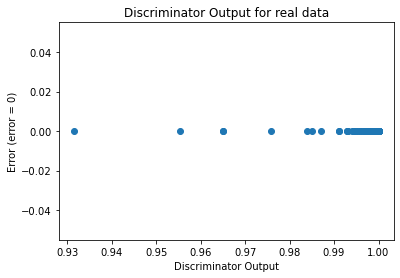

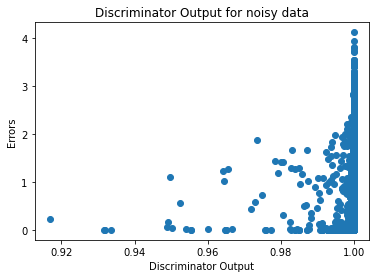

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)